In [69]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [70]:
data_dir = 'F:\datasets\Kaggle\SubsetVMMR'

In [71]:
data_dir

'F:\\datasets\\Kaggle\\SubsetVMMR'

In [72]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('F:/datasets/Kaggle/SubsetVMMR')

In [73]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

1000

In [74]:
honda_civic = list(data_dir.glob('honda_civic/*'))
honda_civic[:5]

[WindowsPath('F:/datasets/Kaggle/SubsetVMMR/honda_civic/00C0C_jlHl4AvLK7I_600x450.jpg'),
 WindowsPath('F:/datasets/Kaggle/SubsetVMMR/honda_civic/00J0J_fvYqT8KEtmh_600x450.jpg'),
 WindowsPath('F:/datasets/Kaggle/SubsetVMMR/honda_civic/00P0P_b9EIKEIV6JC_600x450.jpg'),
 WindowsPath('F:/datasets/Kaggle/SubsetVMMR/honda_civic/00w0w_2a3iPidoCDQ_600x450.jpg'),
 WindowsPath('F:/datasets/Kaggle/SubsetVMMR/honda_civic/1997 honda civic lx_00b0b_gZ9nIca13C0_600x450.jpg')]

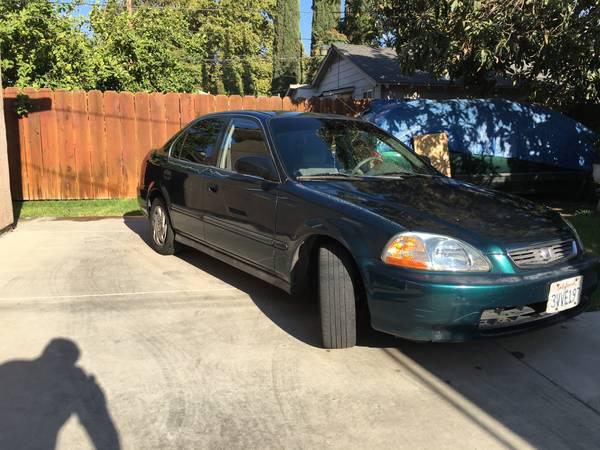

In [75]:
PIL.Image.open(str(honda_civic[19]))

In [76]:
cars_image_dic = {
    'chevrolet_impala': list(data_dir.glob('chevrolet_impala/*')),
    'chevrolet_silverado': list(data_dir.glob('chevrolet_silverado/*')),
    'dodge_ram_1500': list(data_dir.glob('dodge_ram_1500/*')),
    'ford_f150': list(data_dir.glob('ford_f150/*')),
    'gmc_sierra_1500': list(data_dir.glob('gmc_sierra_1500/*')),
    'honda_accord': list(data_dir.glob('honda_accord/*')),
    'honda_civic': list(data_dir.glob('honda_civic/*')),
    'nissan_altima': list(data_dir.glob('nissan_altima/*')),
    'toyota_camry': list(data_dir.glob('toyota_camry/*')),
    'toyota_corolla': list(data_dir.glob('toyota_corolla/*')),
}

In [77]:
cars_labels_dic = {
    'chevrolet_impala': 0,
    'chevrolet_silverado': 1,
    'dodge_ram_1500': 2,
    'ford_f150': 3,
    'gmc_sierra_1500': 4,
    'honda_accord': 5,
    'honda_civic': 6,
    'nissan_altima': 7,
    'toyota_camry': 8,
    'toyota_corolla': 9,
}

In [78]:
str(cars_image_dic['chevrolet_impala'][0])

'F:\\datasets\\Kaggle\\SubsetVMMR\\chevrolet_impala\\00101_7mjApj3wb7Y_600x450.jpg'

In [79]:
img = cv2.imread(str(cars_image_dic['chevrolet_impala'][0]))
img.shape

(450, 600, 3)

In [80]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

In [81]:
X, y = [], []

for cars_name, images in cars_image_dic.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(cars_labels_dic[cars_name])

In [82]:
X = np.array(X)
y = np.array(y)

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [84]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [85]:
X_train_scaled.shape

(750, 224, 224, 3)

In [86]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [87]:
num_of_classes = 10


model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_classes)
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_2 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense_4 (Dense)              (None, 10)                12810     
Total params: 2,270,794
Trainable params: 12,810
Non-trainable params: 2,257,984
_________________________________________________________________


In [88]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=20)

Epoch 1/20
24/24 [==============================] - 21s 705ms/step - loss: 2.2717 - accuracy: 0.1660
Epoch 2/20
24/24 [==============================] - 24s 991ms/step - loss: 1.5956 - accuracy: 0.4618
Epoch 3/20
24/24 [==============================] - 22s 932ms/step - loss: 1.2604 - accuracy: 0.5629
Epoch 4/20
24/24 [==============================] - 21s 863ms/step - loss: 1.1089 - accuracy: 0.6718
Epoch 5/20
24/24 [==============================] - 19s 771ms/step - loss: 0.9298 - accuracy: 0.7430
Epoch 6/20
24/24 [==============================] - 19s 773ms/step - loss: 0.7912 - accuracy: 0.8026
Epoch 7/20
24/24 [==============================] - 19s 783ms/step - loss: 0.7024 - accuracy: 0.8580
Epoch 8/20
24/24 [==============================] - 18s 769ms/step - loss: 0.6698 - accuracy: 0.8595
Epoch 9/20
24/24 [==============================] - 19s 790ms/step - loss: 0.5723 - accuracy: 0.9244
Epoch 10/20
24/24 [==============================] - 19s 773ms/step - loss: 0.5317 - accura

In [89]:
model.evaluate(X_test_scaled, y_test)

8/8 [==============================] - 7s 779ms/step - loss: 0.7947 - accuracy: 0.7320


[0.7947120070457458, 0.7319999933242798]

In [90]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = model.predict(X_test_scaled)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.76      0.73        21
           1       0.62      0.81      0.70        16
           2       0.73      0.73      0.73        30
           3       0.74      0.77      0.75        26
           4       0.65      0.61      0.63        28
           5       0.80      0.77      0.78        26
           6       0.81      0.63      0.71        27
           7       0.72      0.81      0.76        26
           8       0.65      0.75      0.70        20
           9       0.88      0.73      0.80        30

    accuracy                           0.73       250
   macro avg       0.73      0.74      0.73       250
weighted avg       0.74      0.73      0.73       250

